In [57]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)  # One-hot encode labels

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 2D input to 1D
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
# model_adam = model
# model_rms = model
# model_sdg = model
# model_adagrad = model
def nn(model, opt):
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)   
    # Train the model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_test, y_test), callbacks=[early_stopping])

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Test accuracy:", test_acc)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    return loss, val_loss, acc, val_acc


In [58]:
adam_loss, adam_val_loss, adam_acc, adam_val_acc = nn(model,'adam')
RMSprop_loss, RMSprop_val_loss, RMSprop_acc, RMSprop_val_acc = nn(model,'RMSprop')
SGD_loss, SGD_val_loss, SGD_acc, SGD_val_acc = nn(model,'SGD')
# adam_loss, adam_val_loss, adam_acc, adam_val_acc = nn(model,'adam')



Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2562 - accuracy: 0.9269 - val_loss: 0.1395 - val_accuracy: 0.9593
Epoch 2/50
1875/1875 [==============================] - 2s 842us/step - loss: 0.1120 - accuracy: 0.9672 - val_loss: 0.1001 - val_accuracy: 0.9691
Epoch 3/50
1875/1875 [==============================] - 2s 807us/step - loss: 0.0767 - accuracy: 0.9768 - val_loss: 0.0889 - val_accuracy: 0.9724
Epoch 4/50
1875/1875 [==============================] - 2s 822us/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 5/50
1875/1875 [==============================] - 2s 833us/step - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0891 - val_accuracy: 0.9715
Epoch 6/50
1875/1875 [==============================] - 1s 790us/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0830 - val_accuracy: 0.9759
Epoch 7/50
1875/1875 [==============================] - 2s 815us/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0781 - v

### LOSS PLOTS

In [53]:
def plot_loss(adam,rmsprop,sgd,adam_val_loss,rmsprop_val_loss,sgd_val_loss):
    plt.figure(figsize=(10,8))


    plt.subplot(2,2,1)
    plt.plot(adam_acc)
    plt.plot(adam_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['train_acc', 'val_acc'],loc = 'upper right')
    plt.title('ADAM')


    plt.subplot(2,2,2)
    plt.plot(RMSprop_acc)
    plt.plot(RMSprop_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['train_acc', 'val_acc'],loc = 'upper right' )
    plt.title('RMSProp')




    plt.subplot(2,2,3)
    plt.plot(SGD_acc)
    plt.plot(SGD_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['train_acc', 'val_acc'],loc = 'upper right' )
    plt.title('SGD')



    plt.subplot(2,2,4)
    plt.plot(adam_val_acc)
    plt.plot(RMSprop_val_acc)
    plt.plot(SGD_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['adam','RMSProp', 'SGD'],loc = 'upper right' )
    plt.title('VAL_acc_COMPARISON')

    plt.xlabel('Epochs')
    plt.ylabel('acc')

    plt.tight_layout() 
    plt.show()
    

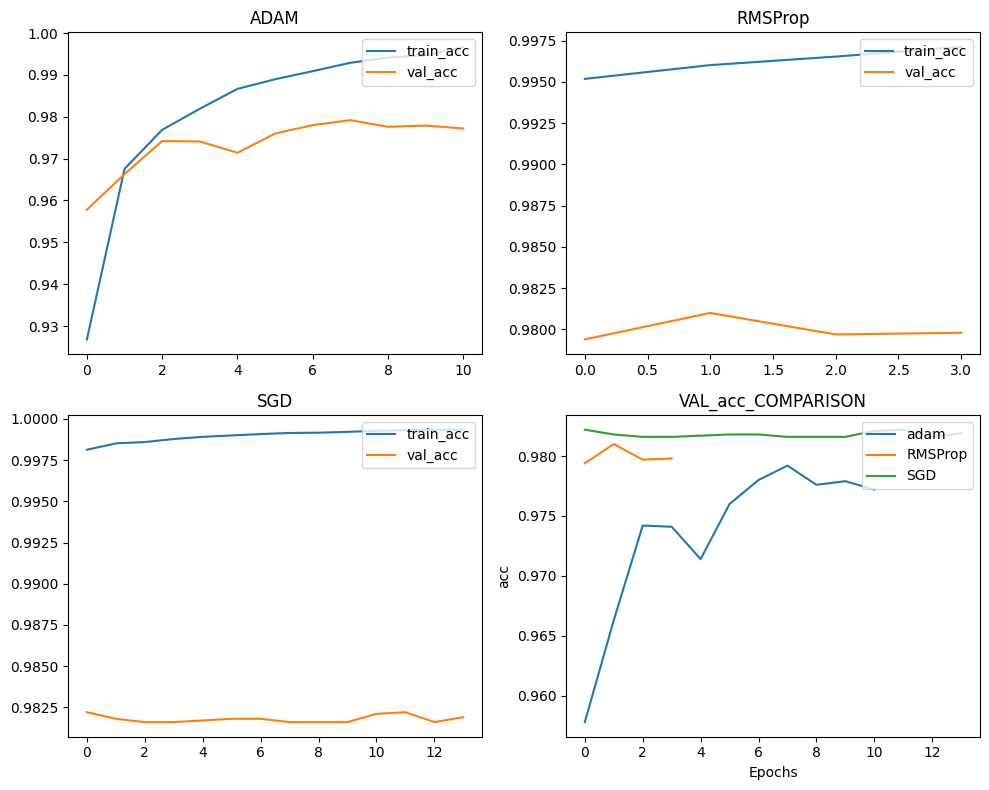

In [54]:
plot_loss(adam_loss,RMSprop_loss,SGD_loss,adam_val_loss,RMSprop_val_loss,SGD_val_loss)

### ACCURACY PLOTS

In [55]:
def plot_acc(adam,rmsprop,sgd,adam_val_loss,rmsprop_val_loss,sgd_val_loss):
    plt.figure(figsize=(10,8))


    plt.subplot(2,2,1)
    plt.plot(adam_acc)
    plt.plot(adam_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['train_acc', 'val_acc'],loc = 'upper right')
    plt.title('ADAM')


    plt.subplot(2,2,2)
    plt.plot(RMSprop_acc)
    plt.plot(RMSprop_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['train_acc', 'val_acc'],loc = 'upper right' )
    plt.title('RMSProp')




    plt.subplot(2,2,3)
    plt.plot(SGD_acc)
    plt.plot(SGD_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['train_acc', 'val_acc'],loc = 'upper right' )
    plt.title('SGD')



    plt.subplot(2,2,4)
    plt.plot(adam_val_acc)
    plt.plot(RMSprop_val_acc)
    plt.plot(SGD_val_acc)
    # plt.xlabel('Epochs')
    # plt.ylabel('acc')
    plt.legend(['adam','RMSProp', 'SGD'],loc = 'upper right' )
    plt.title('VAL_acc_COMPARISON')

    plt.xlabel('Epochs')
    plt.ylabel('acc')

    plt.tight_layout() 
    plt.show()
    

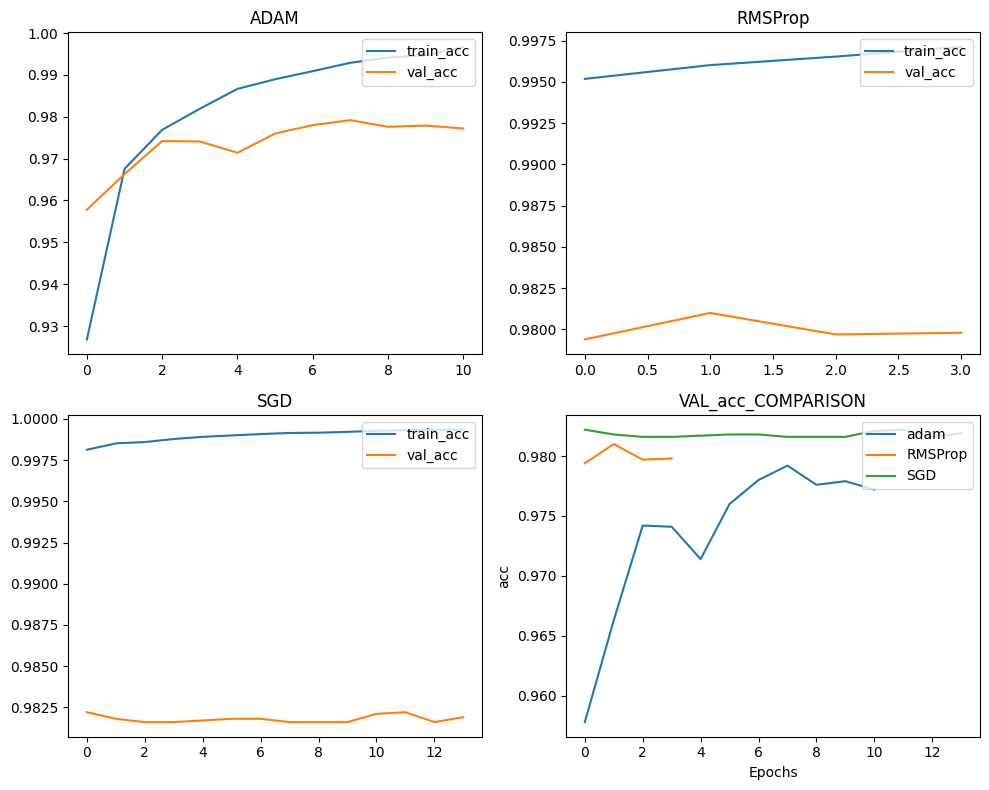

In [56]:
plot_loss(adam_acc,RMSprop_acc,SGD_acc,adam_val_acc,RMSprop_val_acc,SGD_val_acc)
